## Imports

In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from dotenv import load_dotenv
load_dotenv()

True

## Connection

In [2]:
username = os.getenv('POSTGRES_USERNAME')
password = os.getenv('POSTGRES_PASSWORD')


postgres_connection_string = "postgres://{username}:{password}@{host}:{port}/{database}?gssencmode=disable".format(
    username=username,
    password=password,
    host="localhost",
    port="5432",
    database="lahman_baseball"
)

engine = create_engine(postgres_connection_string)

## Table Retriever

In [3]:
def get_table(table_name):
    """This function uses the connection to lahman_baseball database to return a dataframe of all the data in the table"""
    sql = f'SELECT * FROM {table_name};'
    return pd.read_sql(sql, con=engine)

---
# Database Documentation: http://www.seanlahman.com/files/database/readme2017.txt
---

---
# Question 1: What range of years does the provided database cover?

### The documentation indicates that People, Batting, Pitching, and Fielding are the main tables

In [28]:
people_df = get_table('people')

batting_df = get_table('batting')

pitching_df = get_table('pitching')

fielding_df = get_table('fielding')

In [29]:
# Only birthyear in player table, not really 'baseball statistics data'

people_df.columns

Index(['playerid', 'birthyear', 'birthmonth', 'birthday', 'birthcountry',
       'birthstate', 'birthcity', 'deathyear', 'deathmonth', 'deathday',
       'deathcountry', 'deathstate', 'deathcity', 'namefirst', 'namelast',
       'namegiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalgame',
       'retroid', 'bbrefid'],
      dtype='object')

In [35]:
# Batting table:

print('Batting Table Year Min:', batting_df.yearid.min())
print()
print('Batting Table Year Max:', batting_df.yearid.max())

Batting Table Year Min: 1871

Batting Table Year Max: 2016


In [36]:
# Pitching table:

print('Pitching Table Year Min:', pitching_df.yearid.min())
print()
print('Pitching Table Year Max:', pitching_df.yearid.max())

Pitching Table Year Min: 1871

Pitching Table Year Max: 2016


In [37]:
# Fielding table:

print('Fielding Table Year Min:', fielding_df.yearid.min())
print()
print('Fielding Table Year Max:', fielding_df.yearid.max())

Fielding Table Year Min: 1871

Fielding Table Year Max: 2016


## Answer: The main tables cover 1871 - 2016
---

---
# Question 2: Find the name and height of the shortest player in the database. How many games did he play in? What is the name of the team for which he played?

In [38]:
people_df = get_table('people')

appearances_df = get_table('appearances')

teams_df = get_table('teams')

In [47]:
people_df[people_df.height == people_df.height.min()].loc[:,['playerid', 'namefirst', 'namelast', 'namegiven', 'height']]

,playerid,namefirst,namelast,namegiven,height
5843,gaedeed01,Eddie,Gaedel,Edward Carl,43.0


In [70]:
short_id = people_df[people_df.height == people_df.height.min()]['playerid'].to_string(index=False).strip()

In [76]:
print('Number of games played:', appearances_df[appearances_df.playerid == short_id]['g_all'].to_string(index=False))

Number of games played:  1


In [80]:
team_id = appearances_df[appearances_df.playerid == short_id]['teamid'].to_string(index=False).strip()

In [95]:
teams_df.name[teams_df.teamid == team_id].head(1).to_string(index=False).strip()

'St. Louis Browns'

## Answer: Eddie Gaedel was the shortest player. His height was 43.0 inches (see documentation for units). He played 1 game for the St. Louis Browns
---

---
# Question 3: Find all players in the database who played at Vanderbilt University. Create a list showing each player’s first and last names as well as the total salary they earned in the major leagues. Sort this list in descending order by the total salary earned. Which Vanderbilt player earned the most money in the majors?

In [98]:
people_df = get_table('people')

collegeplaying_df = get_table('collegeplaying')

schools_df = get_table('schools')

salaries_df = get_table('salaries')

In [104]:
# Getting the schoolid of Vanderbilt University from the Schools table

vandy_id = schools_df.schoolid[schools_df.schoolname == 'Vanderbilt University'].to_string(index=False).strip()

'vandy'

In [110]:
# Getting a list of playerids from collegeplaying table with the Vanderbilt Unviersity schoolid

vandy_players = collegeplaying_df[collegeplaying_df.schoolid == vandy_id].playerid.unique()

array(['alvarpe01', 'baxtemi01', 'chrisni01', 'colliwi01', 'corajo01',
       'embresl01', 'flahery01', 'grayso01', 'hendrha01', 'katama01',
       'lewisje01', 'madissc01', 'minormi01', 'mooresc01', 'mossma01',
       'pauljo01', 'priceda01', 'priorma01', 'richaan01', 'sandesc01',
       'sewelri01', 'sowerje01', 'willimi01', 'zeidjo01'], dtype=object)

In [113]:
# Making a dataframe by narrowing people down to only the columns of interest for players with playerid in vandy_players

vandy_people = people_df[people_df.playerid.isin(vandy_players)].loc[:,['playerid', 'namefirst', 'namelast']]

In [124]:
# Summing salaries by playerid across all years

salary_sum = salaries_df.groupby(by = 'playerid', as_index = False)['salary'].sum()

In [136]:
vandy_salaries = pd.merge(vandy_people, salary_sum, how = 'inner', on='playerid') \
                          .sort_values(by = ['salary']) \
                          .reset_index(drop = True)

vandy_salaries

,playerid,namefirst,namelast,salary
0,madissc01,Scotti,Madison,135000.0
1,sowerje01,Jeremy,Sowers,384800.0
2,chrisni01,Nick,Christiani,500000.0
3,katama01,Matt,Kata,1060000.0
4,lewisje01,Jensen,Lewis,1234000.0
5,grayso01,Sonny,Gray,1542500.0
6,baxtemi01,Mike,Baxter,2094418.0
7,pauljo01,Josh,Paul,2640000.0
8,flahery01,Ryan,Flaherty,4061000.0
9,corajo01,Joey,Cora,5622500.0


## Answer: David Price earned the most money in the majors. $81,851,296
---

---
# Question 4: Using the fielding table, group players into three groups based on their position: label players with position OF as "Outfield", those with position "SS", "1B", "2B", and "3B" as "Infield", and those with position "P" or "C" as "Battery". Determine the number of putouts made by each of these three groups in 2016.

In [4]:
fielding_df = get_table('fielding')

In [81]:
# Only need the year, postion, putouts, columns from fielding table for this question.

field_pos_po = fielding_df.loc[:,['yearid', 'pos', 'po']]

In [82]:
# Creating a dictionary to assign categories:

category = {'OF':'Outfield', 
            'SS':'Infield', 
            '1B':'Infield',
            '2B':'Infield',
            '3B':'Infield',
            'P' :'Battery',
            'C' :'Battery'}

In [83]:
# Adding categories

field_pos_po['category'] = field_pos_po['pos'].map(category)

In [84]:
# Narrowing to 2016

field_pos_po = field_pos_po.loc[field_pos_po.yearid == 2016]

In [87]:
po_sum = field_pos_po.groupby(['category'], as_index = False)['po'].sum()

po_sum.columns = ['Category', 'Sum of Putouts in 2016']

po_sum

,Category,Sum of Putouts in 2016
0,Battery,41424
1,Infield,58934
2,Outfield,29560


## Answer: 2016 Putouts by Outfield: 29,560, Infield: 58,934, and Battery: 41,424.
---

---
# Question 4: Find the average number of strikeouts per game by decade since 1920. Round the numbers you report to 2 decimal places. Do the same for home runs per game. Do you see any trends?

In [5]:
teams_df = get_table('teams')

In [6]:
# Narrowing dataframe to year, homeruns, strikeouts, and home games (the sum of which is total games played) 
# for years 1920 and after.

teams_df = teams_df.loc[:, ['yearid', 'hr', 'so', 'ghome']]

teams_df = teams_df[teams_df['yearid'] > 1919]

In [7]:
# Adding decade column for grouping

teams_df['decade'] = (teams_df.yearid//10)*10

In [8]:
decade_group = teams_df.groupby('decade').agg({'ghome':'sum', 'hr':'sum', 'so':'sum'}).reset_index()

In [9]:
decade_group['so_per_game'] = round(decade_group.so/decade_group.ghome, 2)

decade_group['hr_per_game'] = round(decade_group.hr/decade_group.ghome, 2)

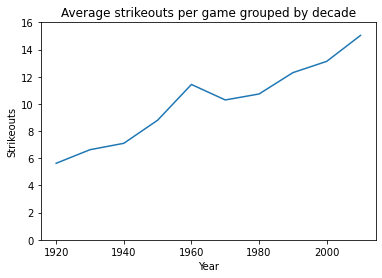

In [15]:
plt.plot(decade_group.decade, decade_group.so_per_game)
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.ylim(0, 16)
plt.title('Average strikeouts per game grouped by decade')
plt.show()

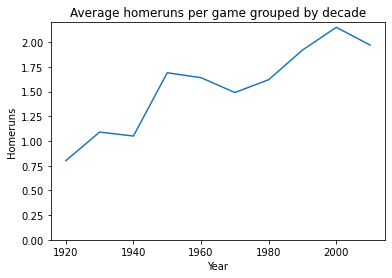

In [16]:
plt.plot(decade_group.decade, decade_group.hr_per_game)
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.ylim(0, 2.2)
plt.title('Average homeruns per game grouped by decade')
plt.show()

## Answer: Both the average and homeruns per game have more than doubled between 1920 and 2010. Both these metrics had small dips in the 1970s decade.
---

---
# Question 5: Find the player who had the most success stealing bases in 2016, where success is measured as the percentage of stolen base attempts which are successful. (A stolen base attempt results either in a stolen base or being caught stealing.) Consider only players who attempted at least 20 stolen bases.

In [29]:
people_df = get_table('people')

batting_df = get_table('batting')

In [30]:
# Limiting batting data to 2016

batting_df = batting_df.loc[batting_df.yearid == 2016]

batting_df = batting_df.loc[:,['playerid', 'sb', 'cs']]

In [32]:
# Grouping playerids so that players who played for 2 different teams in a year get their stats summed

players_stats = batting_df.groupby('playerid').agg({'sb':'sum', 'cs':'sum'}).reset_index()

In [40]:
players_stats['attempts'] = players_stats.sb + players_stats.cs

players_stats['success'] = round(players_stats.sb/players_stats.attempts*100, 2)

In [48]:
results = players_stats[players_stats['attempts'] > 19].sort_values(by = 'success', ascending = False).reset_index(drop = True)

In [52]:
people_names = people_df.loc[:,['playerid', 'namefirst', 'namelast', 'namegiven']]

In [54]:
merge = pd.merge(results, people_names, on = 'playerid')

In [61]:
# Most successful 2016 base stealer. Where success is defined by the question.

merge.loc[[0],['namefirst','namelast','attempts', 'success']]

,namefirst,namelast,attempts,success
0,Chris,Owings,23.0,91.3


## Answer: Chris Owings had a 91.3% success rate with 23 attempts
---

---
# Question 6: From 1970 – 2016, what is the largest number of wins for a team that did not win the world series? What is the smallest number of wins for a team that did win the world series? Doing this will probably result in an unusually small number of wins for a world series champion – determine why this is the case. Then redo your query, excluding the problem year. How often from 1970 – 2016 was it the case that a team with the most wins also won the world series? What percentage of the time?

In [62]:
teams_df = get_table('teams')

In [66]:
teams_df = teams_df.loc[teams_df.yearid > 1969]

teams_df = teams_df.loc[:,['yearid', 'g', 'w', 'wswin', 'name']]

In [73]:
losers = teams_df.loc[teams_df['wswin'] == 'N'].sort_values('w', ascending = False).reset_index(drop = True)

losers.loc[[0]]

,yearid,g,w,wswin,name
0,2001,162,116,N,Seattle Mariners


In [72]:
winners = teams_df.loc[teams_df['wswin'] == 'Y'].sort_values('w').reset_index(drop = True)

winners.loc[[0]]

,yearid,g,w,wswin,name
0,1981,110,63,Y,Los Angeles Dodgers


In [87]:
# Finding how many wins were the max wins in a year

max_wins_per_year = teams_df.groupby('yearid')[['w']].max().reset_index()

max_wins_per_year.columns = ['yearid', 'year_max_wins']

In [89]:
merge = pd.merge(teams_df, max_wins_per_year, how = 'inner', on = 'yearid')

In [91]:
max_win_teams = merge.loc[merge['w'] == merge['year_max_wins']].reset_index()

In [104]:
max_win_teams_exclude = max_win_teams.loc[max_win_teams['yearid'] != 1981]

In [110]:
win_count = max_win_teams_exclude[max_win_teams_exclude['wswin'] == 'Y']['wswin'].count()

win_percent = round(max_win_teams_exclude[max_win_teams_exclude['wswin'] == 'Y']['wswin'] \
                    .count()/max_win_teams_exclude['wswin'].count()*100, 2)

print(f'Between 1970 and 2016 the team with the most wins that season won the World Series {win_percent}% of the time.')
print(f'This happened {win_count} times.')

Between 1970 and 2016 the team with the most wins that season won the World Series 23.53% of the time.
This happened 12 times.


## Answers: Between 1970 and 2016 the team with the most wins that lost the World Series was the 2001 Seattle Mariners with 116 wins in 162 games played. The smallest number of wins for a team that won the World Series between 1970 and 2016 was the 1981 Los Angeles Dodgers with 63 wins. There was a shorter than usual season due to a players strike. Without 1981 the team with the most season wins also won the World Series 12 times, 23.53% of the time
---

---
# Question 7: Using the attendance figures from the homegames table, find the teams and parks which had the top 5 average attendance per game in 2016 (where average attendance is defined as total attendance divided by number of games). Only consider parks where there were at least 10 games played. Report the park name, team name, and average attendance. Repeat for the lowest 5 average attendance.

In [126]:
teams_df = get_table('teams')

parks_df = get_table('parks')

homegames_df = get_table('homegames')

In [127]:
# 2016 only, more than 9 games played

homegames_df = homegames_df.loc[homegames_df['year'] == 2016]

homegames_df = homegames_df.loc[homegames_df['games'] > 9]

In [129]:
homegames_df['avg_attendance'] = round(homegames_df.attendance/homegames_df.games, 2)

homegames_df = homegames_df.sort_values(['avg_attendance']).reset_index(drop = True)

In [161]:
# Some teams kept the same teamid throughout the years but changed names. Using only 2016 team names eliminates that issue

teams_df = teams_df.loc[teams_df['yearid'] == 2016]

In [164]:
# Creating tables for joins to get team names and park names

teams_lookup = teams_df.loc[:,['teamid', 'name']]

parks_lookup = parks_df.loc[:,['park', 'park_name']]

In [165]:
# Bringing in team name

merge1 = pd.merge(homegames_df, teams_lookup.drop_duplicates(subset = ['teamid']), 
                                how = 'left', 
                                left_on = 'team', 
                                right_on = 'teamid'
                                )

In [166]:
results = pd.merge(merge1, parks_lookup.drop_duplicates(subset = ['park']), 
                                how = 'left', 
                                on = 'park'
                                )
results = results.loc[:,['park_name', 'name', 'avg_attendance']]

results.columns = ['park_name', 'team_name', 'avg_2016_attendance_per_game']

In [167]:
top_5 = results.iloc[-5:]

top_5

,park_name,team_name,avg_2016_attendance_per_game
25,Wrigley Field,Chicago Cubs,39906.42
26,AT&T Park,San Francisco Giants,41546.37
27,Rogers Centre,Toronto Blue Jays,41877.77
28,Busch Stadium III,St. Louis Cardinals,42524.57
29,Dodger Stadium,Los Angeles Dodgers,45719.90


In [168]:
bottom_5 = results.iloc[:5]

bottom_5

,park_name,team_name,avg_2016_attendance_per_game
0,Tropicana Field,Tampa Bay Rays,15878.56
1,Oakland-Alameda County Coliseum,Oakland Athletics,18784.02
2,Progressive Field,Cleveland Indians,19650.21
3,Marlins Park,Miami Marlins,21405.21
4,U.S. Cellular Field,Chicago White Sox,21559.17


## Answer: 

## Top 5 Parks:

|park_name |team_name |avg_2016_attendance_per_game |
|----------|----------|-----------------------------|
|Wrigley Field|	Chicago Cubs|	39906.42
|AT&T Park	|San Francisco Giants|	41546.37
|Rogers Centre|	Toronto Blue Jays|	41877.77
|Busch Stadium III|	St. Louis Cardinals	|42524.57
|Dodger Stadium|	Los Angeles Dodgers	|45719.90

## Bottom 5 Parks:

|park_name|team_name|avg_2016_attendance_per_game|
|---------|---------|----------------------------|
|Tropicana Field|	Tampa Bay Rays|	15878.56
|Oakland-Alameda County Coliseum|	Oakland Athletics|	18784.02
|Progressive Field|	Cleveland Indians|	19650.21
|Marlins Park|	Miami Marlins|	21405.21
|U.S. Cellular Field|	Chicago White Sox|	21559.17

---

---
# Question 8: Which managers have won the TSN Manager of the Year award in both the National League (NL) and the American League (AL)? Give their full name and the teams that they were managing when they won the award.

In [215]:
awardsmanagers_df = get_table('awardsmanagers')

managers_df = get_table('managers')

people_df = get_table('people')

teams_df = get_table('teams')

In [191]:
# Narrow to TSN winners

tsn_awards = awardsmanagers_df[awardsmanagers_df['awardid'] == 'TSN Manager of the Year']

In [192]:
# Narrow to leagues of interest

tsn_awards_al = tsn_awards[tsn_awards['lgid'] == 'AL']

tsn_awards_nl = tsn_awards[tsn_awards['lgid'] == 'NL']

In [239]:
# Finding playerids that are in both lists of winners

both_leagues = tsn_awards_al[tsn_awards_al['playerid'].isin(tsn_awards_nl['playerid'].unique())]['playerid'].to_list()

In [249]:
# Table of just managers who won the TSN Manager of the Year in the NL and Al leagues.

won_both = tsn_awards[tsn_awards['playerid'].isin(both_leagues)].drop(['tie', 'notes', 'lgid'], axis = 1).reset_index()

In [221]:
team_crosswalk = teams_df.loc[:,['yearid', 'teamid', 'name']]

people_crosswalk = people_df.loc[:,['playerid', 'namelast', 'namefirst']]

In [253]:
# Narrowing managers table to columns of interest and adding team id to the table

managers_df = managers_df.loc[:, ['playerid', 'yearid', 'teamid']]

won_both = pd.merge(won_both, managers_df, how = 'inner', left_on = ['playerid', 'yearid'], right_on = ['playerid', 'yearid'])

In [259]:
# Merging in names from people_crosswalk and team names from team_crosswalk to the table

won_both = pd.merge(won_both, people_crosswalk, how = 'inner', on = 'playerid')

won_both = pd.merge(won_both, team_crosswalk, how = 'inner', left_on = ['teamid', 'yearid'], right_on = ['teamid', 'yearid'])

In [263]:
won_both = won_both.loc[:,['namefirst', 'namelast', 'yearid', 'awardid', 'name']]

won_both.columns = ['First Name', 'Last Name', 'Award Year', 'Award', 'Team Name']

won_both

,First Name,Last Name,Award Year,Award,Team Name
0,Jim,Leyland,1988,TSN Manager of the Year,Pittsburgh Pirates
1,Jim,Leyland,1990,TSN Manager of the Year,Pittsburgh Pirates
2,Jim,Leyland,1992,TSN Manager of the Year,Pittsburgh Pirates
3,Jim,Leyland,2006,TSN Manager of the Year,Detroit Tigers
4,Davey,Johnson,1997,TSN Manager of the Year,Baltimore Orioles
5,Davey,Johnson,2012,TSN Manager of the Year,Washington Nationals


## Answer:

|First Name|Last Name|Award Year|Award|Team Name|
|--|--|--|--|--|
|Jim|	Leyland	|1988|	TSN Manager of the Year|Pittsburgh Pirates|
|Jim|	Leyland	|1990|	TSN Manager of the Year|	Pittsburgh Pirates|
|Jim|	Leyland	|1992|	TSN Manager of the Year	|Pittsburgh Pirates|
|Jim|	Leyland	|2006|	TSN Manager of the Year	|Detroit Tigers|
|Davey|	Johnson	|1997|	TSN Manager of the Year	|Baltimore Orioles|
|Davey|	Johnson|	2012|	TSN Manager of the Year|	Washington Nationals|

---

---
# Bonus Question 1: Analyze all the colleges in the state of Tennessee. Which college has had the most success in the major leagues. Use whatever metric for success you like - number of players, number of games, salaries, world series wins, etc.

### I watched Moneyball and I seem to remember than on-base percentage was an important statistic. I plan to measure 'sucess' by career on-base percentage for all the players that went to that school.

In [264]:
batting_df = get_table('batting')

people_df = get_table('people')

collegeplaying_df = get_table('collegeplaying')

schools_df = get_table('schools')

In [275]:
people_crosswalk = people_df.loc[:,['playerid', 'namefirst', 'namelast']]

schools_crosswalk = schools_df.loc[:,['schoolid', 'schoolname']]

In [267]:
tn_school_ids = schools_df[schools_df['schoolstate'] == 'TN']['schoolid'].to_list()

In [283]:
tn_collegeplaying_df = collegeplaying_df[collegeplaying_df['schoolid'].isin(tn_school_ids)]

In [284]:
tn_collegeplaying_df = pd.merge(tn_collegeplaying_df, schools_crosswalk, how = 'inner', on = 'schoolid')

tn_collegeplaying_df = tn_collegeplaying_df.drop(['schoolid', 'yearid'], axis = 1)

In [294]:
tn_batting = batting_df[batting_df['playerid'].isin(tn_collegeplaying_df['playerid'].unique())]

tn_batting = tn_batting.loc[:,['playerid', 'h', 'ab']]

In [297]:
college_hits = pd.merge(tn_collegeplaying_df, tn_batting, how = 'inner', on = 'playerid')

college_hits = college_hits.drop(['playerid'], axis = 1)

In [337]:
college_grouped = college_hits.groupby('schoolname').agg({'h':'sum', 'ab':'sum'}).reset_index()

college_grouped['onbase'] = round(college_grouped['h']/college_grouped['ab'], 3)

college_grouped = college_grouped.sort_values('onbase').reset_index(drop = True)

college_grouped = college_grouped.dropna(subset = ['onbase'])

college_grouped

,schoolname,h,ab,onbase
0,Lipscomb University,0,123,0.000
1,Tennessee Technological University,0,6,0.000
2,Lambuth University,0,18,0.000
3,Lincoln Memorial University,0,26,0.000
4,Motlow State Community College,14,139,0.101
5,Belmont University,6,48,0.125
6,Jackson State Community College,45,353,0.127
7,Tennessee Wesleyan College,133,775,0.172
8,Southwest Tennessee Community College,215,1226,0.175
9,King College,192,1060,0.181


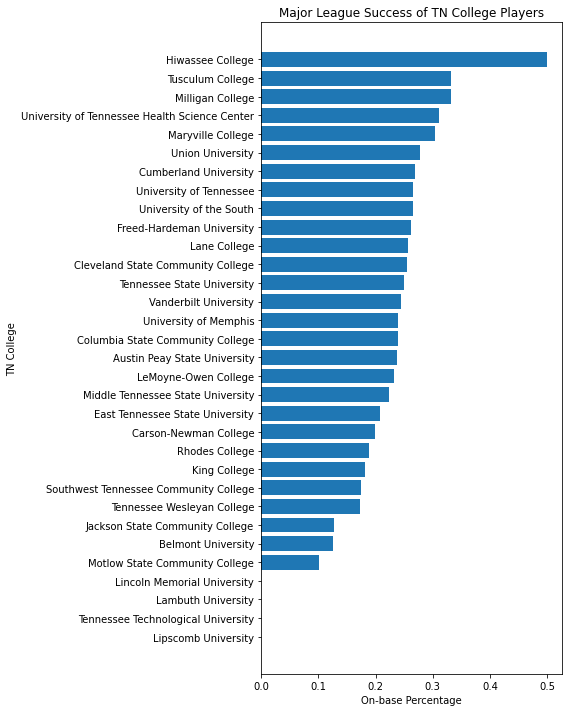

In [336]:
fig, ax = plt.subplots(figsize = (8, 10))

ax.barh(college_grouped.schoolname, college_grouped.onbase)
ax.set_xlabel('On-base Percentage')
ax.set_ylabel('TN College')
ax.set_title('Major League Success of TN College Players')
plt.tight_layout()
plt.show()

## Answer: Hiwassee College has the best on-base percentage, 0.500 but only has 8 major league at bats. Tusculum College and Milligan College are better candidates for most successful TN college with on-base percentages of 0.331 in 2450 and 4901 at bats respectively.
---

---
# Bonus Question 2: Is there any correlation between number of wins and team salary? Use data from 2000 and later to answer this question. As you do this analysis, keep in mind that salaries across the whole league tend to increase together, so you may want to look on a year-by-year basis.

In [355]:
salaries_df = get_table('salaries')

teams_df = get_table('teams')

In [356]:
salaries_df = salaries_df.drop(['lgid', 'playerid'], axis = 1)

team_salaries = salaries_df.groupby(['yearid', 'teamid']).sum().reset_index()

team_salaries = team_salaries.loc[team_salaries['yearid'] > 1999]

In [358]:
teams_df = teams_df.loc[:,['yearid', 'teamid', 'g', 'w', 'name']]

teams_df = teams_df.loc[teams_df['yearid'] > 1999]

teams_df['win_percent'] = round(teams_df.w/teams_df.g*100, 2)

In [362]:
salary_wins = pd.merge(teams_df, team_salaries, how = 'inner', on = ['yearid', 'teamid'])

In [370]:
year_correlations = []

for i in salary_wins['yearid'].unique():
    year_df = salary_wins[salary_wins['yearid'] == i]
    corr = round(year_df['win_percent'].corr(year_df['salary']), 3)
    year_correlations.append([i, corr])
    print(i, corr)
    
year_correlations_df = pd.DataFrame(year_correlations, columns = ['Year', 'Correlation'])

2000 0.331
2001 0.325
2002 0.443
2003 0.416
2004 0.539
2005 0.491
2006 0.538
2007 0.496
2008 0.323
2009 0.478
2010 0.369
2011 0.409
2012 0.19
2013 0.302
2014 0.322
2015 0.24
2016 0.633


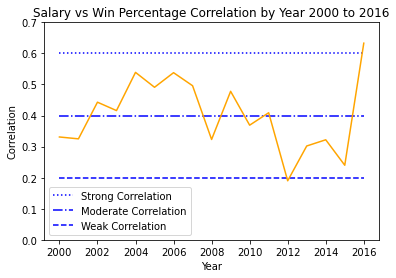

In [416]:
fig, ax = plt.subplots()

ax.plot([2000, 2016], [0.6, 0.6], label = 'Strong Correlation', linestyle = ':', color = 'blue')
ax.plot([2000, 2016], [0.4, 0.4], label = 'Moderate Correlation', linestyle = '-.', color = 'blue')
ax.plot([2000, 2016], [0.2, 0.2], label = 'Weak Correlation', linestyle = '--', color = 'blue')
ax.plot()
ax.plot(year_correlations_df.Year, year_correlations_df.Correlation, color = 'orange')
ax.set_ylim(0, 0.7)
ax.set_ylabel('Correlation')
ax.set_xlabel('Year')
ax.set_title('Salary vs Win Percentage Correlation by Year 2000 to 2016')
ax.legend()

plt.show()

## Answer: On a year to year basis, after the year 2000 the data show that win percentage and team salary are positively correlated. Just over half the years analyzed (9 of 16) meet the threshold for a Moderate Correlation. And only 1 year in the range (2012) doesn't meet at least Weak Correlation.
---

---
# Bonus Question 3: It is thought that since left-handed pitchers are more rare, causing batters to face them less often, that they are more effective. Investigate this claim and present evidence to either support or dispute this claim. First, determine just how rare left-handed pitchers are compared with right-handed pitchers. Are left-handed pitchers more likely to win the Cy Young Award? Are they more likely to make it into the hall of fame?

In [386]:
pitching_df = get_table('pitching')

people_df = get_table('people')

halloffame_df = get_table('halloffame')

awardsplayers_df = get_table('awardsplayers')

### Frequency and Effectiveness of Handedness of Pitchers

In [390]:
pitching_df = pitching_df.loc[:, ['playerid', 'ipouts', 'era']]

In [393]:
people_df = people_df.loc[:, ['playerid', 'throws']]

In [400]:
merge = pd.merge(pitching_df, people_df, how = 'inner', on = 'playerid').dropna(subset = ['throws'])

In [407]:
innings_pitched = merge.groupby('throws')['ipouts'].sum().reset_index()

innings_pitched = innings_pitched[:2]

,throws,ipouts
0,L,2986644
1,R,8363691


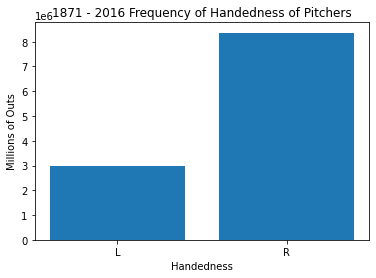

In [412]:
plt.bar(innings_pitched.throws, innings_pitched.ipouts)
plt.xlabel('Handedness')
plt.ylabel('Millions of Outs')
plt.title('1871 - 2016 Frequency of Handedness of Pitchers')
plt.show()

In [419]:
merge['ipoutsxera'] = merge['ipouts']*merge['era']

In [423]:
effective = merge.groupby('throws').agg({'ipouts':'sum', 'ipoutsxera':'sum'}).reset_index()

In [426]:
effective['weighted_era'] = effective['ipoutsxera']/effective['ipouts']

effective = effective[:2]

,throws,ipouts,ipoutsxera,weighted_era
0,L,2986644,11466002.81,3.839093
1,R,8363691,32103655.41,3.838455


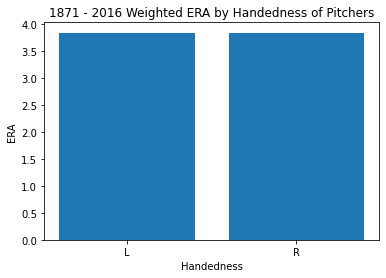

In [427]:
plt.bar(effective.throws, effective.weighted_era)
plt.xlabel('Handedness')
plt.ylabel('ERA')
plt.title('1871 - 2016 Weighted ERA by Handedness of Pitchers')
plt.show()

### Cy Young Winners by Handedness

In [440]:
cy_young = awardsplayers_df[awardsplayers_df['awardid'] == 'Cy Young Award'].reset_index(drop = True)

cy_young_players = cy_young.playerid.unique()

In [459]:
righties_ids = merge[merge['throws'] == 'R']['playerid'].unique()

lefties_ids = merge[merge['throws'] == 'L']['playerid'].unique()

In [455]:
cy_right_count = len(set(righties_ids) & set(cy_young_players))

cy_left_count = len(set(lefties_ids) & set(cy_young_players))

In [457]:
left_cy_percent = round(cy_left_count/len(cy_young_players)*100, 2)

right_cy_percent  = round(cy_right_count/len(cy_young_players)*100, 2)

In [461]:
left_percent = round(len(lefties_ids)/(len(lefties_ids) + len(righties_ids))*100, 2)

right_percent = round(len(righties_ids)/(len(lefties_ids) + len(righties_ids))*100, 2)

In [463]:
print(f'Percentage of Cy Young Winners who are left handed: {left_cy_percent}. Percent of left handed pitchers: {left_percent}')

print(f'Percentage of Cy Young Winners who are right handed: {right_cy_percent}. Percent of right handed pitchers: {right_percent}')

Percentage of Cy Young Winners who are left handed: 31.17. Percent of left handed pitchers: 27.27
Percentage of Cy Young Winners who are right handed: 68.83. Percent of right handed pitchers: 72.73


### Hall of Fame by Handedness

In [465]:
halloffame_ids = halloffame_df['playerid'].unique()

In [467]:
hof_right_count = len(set(righties_ids) & set(halloffame_ids))

hof_left_count = len(set(lefties_ids) & set(halloffame_ids))

hof_pitcher_total = hof_left_count + hof_right_count

In [468]:
left_hof_percent = round(hof_left_count/hof_pitcher_total*100, 2)

right_hof_percent  = round(hof_right_count/hof_pitcher_total*100, 2)

In [469]:
print(f'Percentage of Hall of Famers who are left handed: {left_hof_percent}. Percent of left handed pitchers: {left_percent}')

print(f'Percentage of Hall of Famers who are right handed: {right_hof_percent}. Percent of right handed pitchers: {right_percent}')

Percentage of Hall of Famers who are left handed: 28.89. Percent of left handed pitchers: 27.27
Percentage of Hall of Famers who are right handed: 71.11. Percent of right handed pitchers: 72.73


## Answer: Since 1871 right handed pitchers have thrown more than twice as many outs as left handed pitchers. 8.3 million outs vs 2.9 million outs. One measure of effectiveness, ERA is pretty much identical between right and left handed pitchers. Cy Young winners are pretty proportional compared to pitcher frequency. Same for members of the Hall of Fame.
---

In [470]:
engine.dispose()